## Testing Distributions

As the start of our second pass through the epicycle, we wish to refine and expand our exploratory analysis. We will compute vertex and edge features on our graphs across multiple scales and multiple datasets.

#### Setup

In [21]:
from scipy.stats import gaussian_kde
from ipywidgets import widgets

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections
import os

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

In [22]:
S = 10
n = 70
p = 0.4

myer = {('er'+str(s)): nx.erdos_renyi_graph(n, p) for s in range(S)}
mydd = {('dd'+str(s)): nx.duplication_divergence_graph(n, p) for s in range(S)}
mypl = {('pl'+str(s)): nx.powerlaw_cluster_graph(n, int(n/3), p) for s in range(S)}
myba = {('ba'+str(s)): nx.barabasi_albert_graph(n, int(n/3)) for s in range(S)}
myrr = {('rr'+str(s)): nx.random_regular_graph(int(n/3), n) for s in range(S)}
myws = {('ws'+str(s)): nx.watts_strogatz_graph(n, int(n/3), p) for s in range(S)}
myls = {('ls'+str(s)): nx.random_lobster(n, 2*p, p) for s in range(S)}

mm = collections.OrderedDict()
mm["Erdos Renyi"]=myer
mm["Duplication Divergence"]=mydd
mm["Power Law"]=mypl
mm["Barabasi Albert"]=myba
mm["Random Regular"]=myrr
mm["Watts Strogatz"]=myws
mm["Random Lobster"]=myls

#### Number of Non-Zero (NNZ) edge weights

In [23]:
nnz = collections.OrderedDict((gs, np.mean([len(nx.edges(mm[gs][key])) for key in mm[gs]])) for gs in mm)

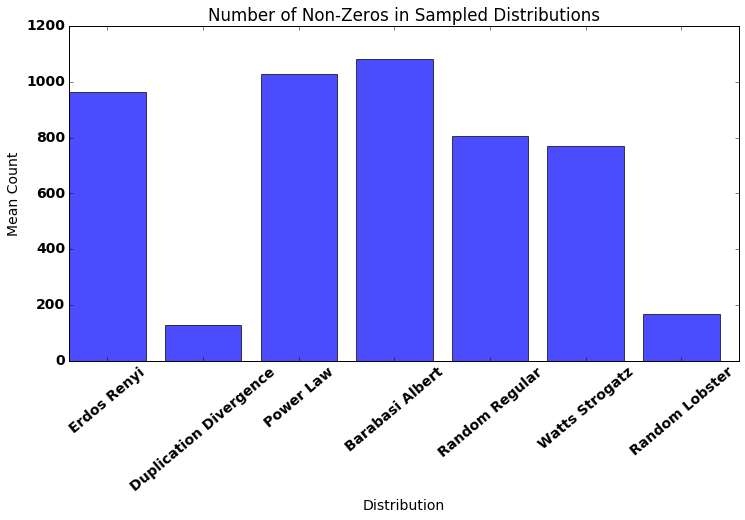

In [58]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(nnz)),nnz.values(), alpha=0.7)
plt.title('Number of Non-Zeros in Sampled Distributions')
plt.ylabel('Mean Count')
plt.xlabel('Distribution')
plt.xticks(np.arange(len(nnz))+0.4,mm.keys(), rotation=40)
plt.xlim((0, len(nnz.keys())))
plt.savefig('../figs/distribs/sample_nnz.png')
plt.show()

#### Vertex Degree

In [15]:
degrees = collections.OrderedDict((gs, np.array([item for sublist in [nx.degree(mm[gs][key]).values()
                                                for key in mm[gs]] for item in sublist])) for gs in mm)

# avg_degrees = [np.mean(degrees[key]) for key in degrees]

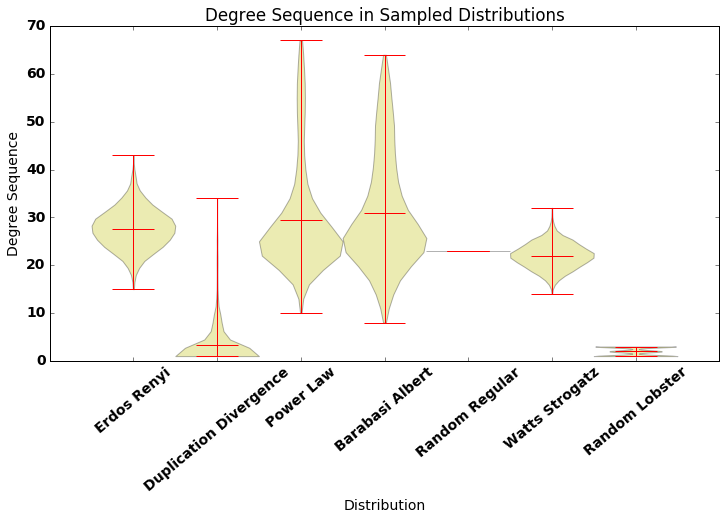

In [57]:
fig = plt.figure(figsize=(12,6))
plt.violinplot(degrees.values(), range(len(degrees)), points=20, widths=1, showmeans=True, showextrema=True)
plt.title('Degree Sequence in Sampled Distributions')
plt.ylabel('Degree Sequence')
plt.xlabel('Distribution')
plt.xticks(np.arange(len(degrees)),mm.keys(), rotation=40)
plt.xlim((-1, len(degrees.keys())))
plt.ylim((0, 70))
plt.savefig('../figs/distribs/sample_degree.png')
plt.show()

#### Edge count

In [27]:
# e_count = collections.OrderedDict((key, len(nx.edges(mygs[key]))) for key in mygs)
e_count = collections.OrderedDict((gs, np.mean([len(nx.edges(mm[gs][key])) for key in mm[gs]])) for gs in mm)

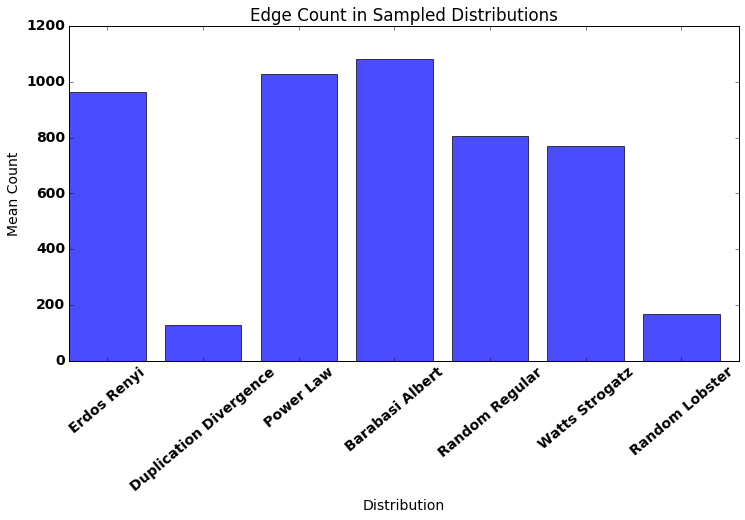

In [56]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(e_count)),e_count.values(), alpha=0.7)
plt.title('Edge Count in Sampled Distributions')
plt.ylabel('Mean Count')
plt.xlabel('Distribution')
plt.xticks(np.arange(len(nnz))+0.4,mm.keys(), rotation=40)
plt.xlim((0, len(e_count.keys())))
plt.savefig('../figs/distribs/sample_edges.png')
plt.show()

#### Number of Local 3-cliques

In [62]:
keyss = [mm[gs][key] for gs in mm.keys() for key in mm[gs].keys() ]
# [mm[key] for key in keys]

In [40]:
three_cliques = collections.OrderedDict((gs, np.mean([[clique for clique in
                       nx.algorithms.clique.enumerate_all_cliques(mm[gs][key])
                       if len(clique) == 3] for key in mm[gs].keys()])) for gs in mm.keys())
# nnz = collections.OrderedDict((gs, np.mean([len(nx.edges(mm[gs][key])) for key in mm[gs]])) for gs in mm)
n_three_cliques = [len(three_cliques[key]) for key in three_cliques]

TypeError: unsupported operand type(s) for /: 'list' and 'int'

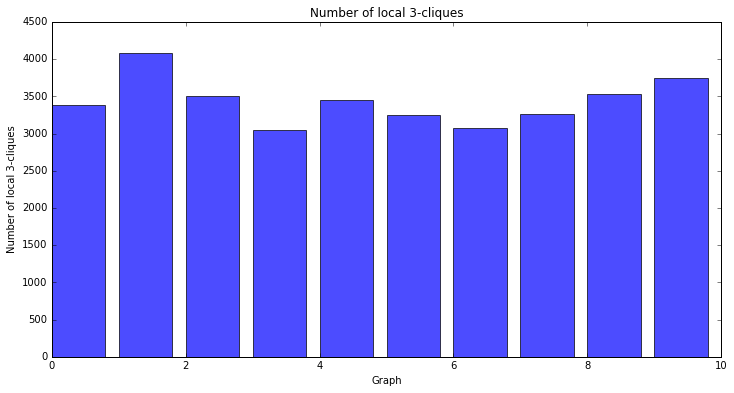

In [61]:
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(n_three_cliques)),n_three_cliques, alpha=0.7)
plt.title('Number of local 3-cliques')
plt.ylabel('Number of local 3-cliques')
plt.xlabel('Graph')
plt.xlim((0, len(three_cliques.keys())))
plt.show()

#### Clustering Coefficient

In [48]:
# ccoefs = collections.OrderedDict((key, nx.clustering(mygs[key]).values()) for key in mygs)
ccoefs = collections.OrderedDict((gs, np.array([item for sublist in [nx.clustering(mm[gs][key]).values()
                                                for key in mm[gs]] for item in sublist])) for gs in mm)
avg_ccoefs = [np.mean(ccoefs[key]) for key in ccoefs]

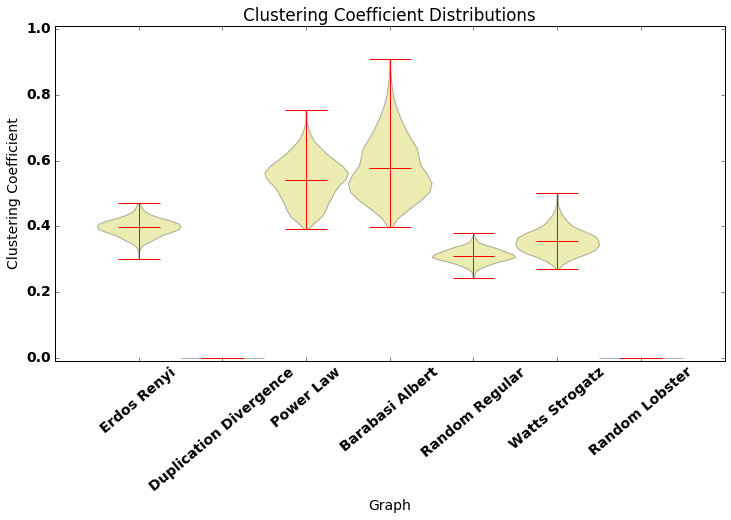

In [55]:
fig = plt.figure(figsize=(12,6))
plt.violinplot(ccoefs.values(), range(len(ccoefs)), points=20, widths=1, showmeans=True, showextrema=True)
plt.title('Clustering Coefficient Distributions')
plt.ylabel('Clustering Coefficient')
plt.xlabel('Graph')
plt.xticks(np.arange(len(degrees)),mm.keys(), rotation=40)
# plt.xlim((-1, len(ccoefs.keys())))
plt.ylim((-0.01, 1.01))
plt.savefig('../figs/distribs/sample_cc.png')
plt.show()

#### Scan Statistic-i

In [60]:
i = 1
def scan_statistic(mygs, i):
    ss = collections.OrderedDict()
    for key in mygs.keys():
        g = mygs[key]
        tmp = np.array(())
        for n in g.nodes():
            subgraph = nx.ego_graph(g, n, radius = i)
            tmp = np.append(tmp, np.sum([1 for e in subgraph.edges()]))
        ss[key] = tmp
    return ss

ss1 = scan_statistic(mm, i)

AttributeError: 'dict' object has no attribute 'nodes'

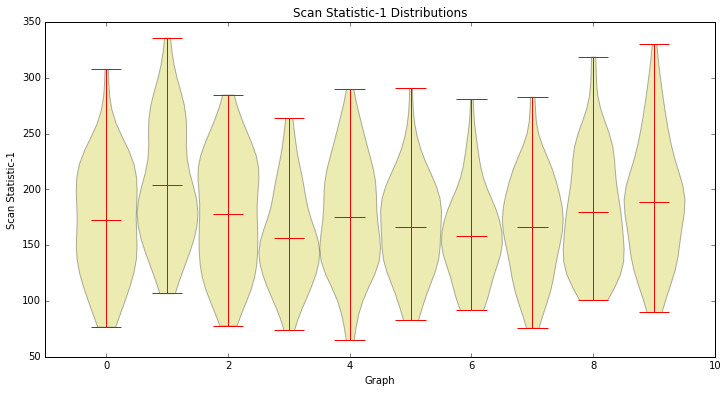

In [68]:
fig = plt.figure(figsize=(12,6))
plt.violinplot(ss1.values(), range(len(ss1)), points=20, widths=1, showmeans=True, showextrema=True)
plt.title('Scan Statistic-1 Distributions')
plt.ylabel('Scan Statistic-1')
plt.xlabel('Graph')
plt.xlim((-1, len(ss1.keys())))
plt.savefig('../figs/distribs/sample_cc.png')
plt.show()

In [69]:
i = 2
ss2 = scan_statistic(mygs, i)

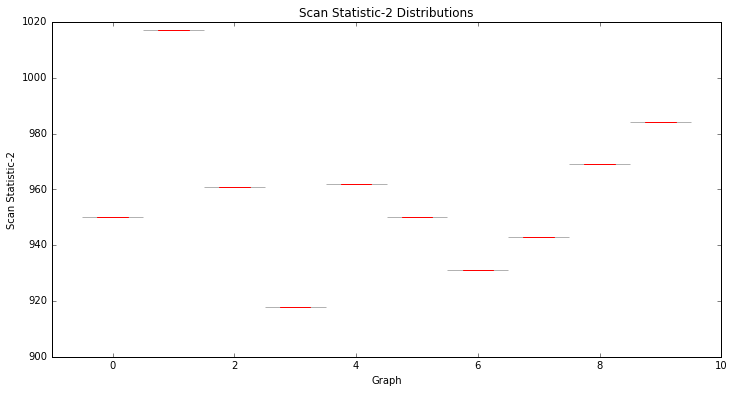

In [71]:
fig = plt.figure(figsize=(12,6))
plt.violinplot(ss2.values(), range(len(ss2)), points=20, widths=1, showmeans=True, showextrema=True)
plt.title('Scan Statistic-2 Distributions')
plt.ylabel('Scan Statistic-2')
plt.xlabel('Graph')
plt.xlim((-1, len(ss2.keys())))
plt.show()

#### Eigen value

In [68]:
# ccoefs = collections.OrderedDict((gs, np.array([item for sublist in [nx.clustering(mm[gs][key]).values()
#                                                 for key in mm[gs]] for item in sublist])) for gs in mm)

laplacian = collections.OrderedDict((gs, np.array([np.asarray(item) for sublist in [nx.normalized_laplacian_matrix(mm[gs][key])
                                                   for key in mm[gs]] for item in sublist])) for gs in mm)
# laplacian = collections.OrderedDict((gs, nx.normalized_laplacian_matrix(mygs[key])) for key in mygs)

eigs = collections.OrderedDict((gs, np.array([item for sublist in [np.sort(np.linalg.eigvals(laplacian[gs][key].A))[::-1]
                                                for key in laplacian[gs]] for item in sublist])) for gs in laplacian)
# eigs = collections.OrderedDict((key, np.sort(np.linalg.eigvals(laplacian[key].A))[::-1]) for key in laplacian)

IndexError: arrays used as indices must be of integer (or boolean) type

In [72]:
laplacian['Erdos Renyi'][0]

array(<1x70 sparse matrix of type '<type 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>, dtype=object)

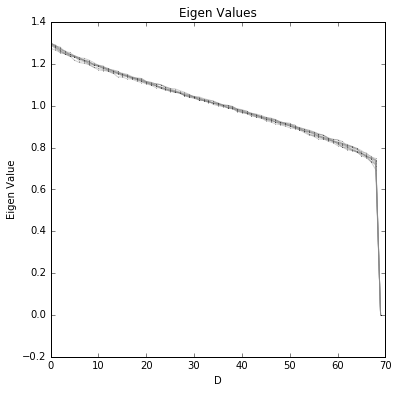

In [73]:
fig = plt.figure(figsize=(6,6))
plt.hold(True)
for key in eigs.keys():
#     dens = gaussian_kde(eigs[key])
#     x = np.linspace(0, 1.2*np.max(eigs[key]), 1000)
    plt.plot(eigs[key], 'ro-', markersize=0.4, color='#888888', alpha=0.4)
plt.title('Eigen Values')
plt.ylabel('Eigen Value')
plt.xlabel('D')
plt.show()

#### Betweenness Centrality

In [75]:
centrality = collections.OrderedDict((key, nx.algorithms.betweenness_centrality(mm[key]).values())
                                     for key in mm.keys())

KeyError: 0

In [73]:
fig = plt.figure(figsize=(12,6))
plt.violinplot(centrality.values(), range(len(centrality.values())), points=20, widths=1, showmeans=True, showextrema=True)
plt.title('Node Centrality Distributions')
plt.ylabel('Centrality')
plt.xlabel('Graph')
plt.xlim((-1, len(centrality.keys())))
plt.ylim((-0.001, .2 ))
plt.show()

NameError: name 'centrality' is not defined

#### Connected Compontent (abandonning for now)

In [25]:
ccs = {keys: nx.connected_component_subgraphs(mygs[keys]) for keys in mygs.keys()}
# nccs = {keys: len(list(ccs[keys])) for keys in ccs.keys()}
# print nccs
lccs = {keys: max(ccs[keys], key=len) for keys in ccs.keys()}